In [1]:
import pandas as pd     
import numpy as np

import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns           
colour=sns.color_palette()

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('trainingData.csv')
df.head(5)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [3]:
df.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [4]:
df.loan_tenure.value_counts()

12    39294
6       382
24      244
15       53
14       10
18        6
48        4
84        2
72        2
3         2
60        1
Name: loan_tenure, dtype: int64

In [5]:
df.loan_installments.nunique()

21

In [6]:
df.shape

(40000, 21)

In [7]:
df.city.nunique()

856

In [8]:
df.type_of_house.unique()

array(['R', 'T1', 'T2', nan], dtype=object)

In [9]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [10]:
q1_inc = df.annual_income.quantile(0.25)
q3_inc = df.annual_income.quantile(0.75)
q1_inc,q3_inc

(14400.0, 56000.0)

In [11]:
iqr = q3_inc-q1_inc
iqr

41600.0

In [12]:
lo = q1_inc - iqr*1.5
lu = q3_inc + iqr*1.5
lo,lu

(-48000.0, 118400.0)

In [13]:
# Here from the above stats we can see that there are not much of missing values
# Columns like age,monthly_expenses, occupants_count, house_area seems to have outliers

In [14]:
df.describe(include=object)

,city,sex,social_class,primary_business,secondary_business,type_of_house,loan_purpose
count,38136,40000,34745,39974,34759,39306,39974
unique,856,3,519,441,5,3,37
top,Pusad,F,OBC,Tailoring,none,T2,Apparels
freq,3154,37622,10683,3971,27366,17715,7064


In [15]:
df.sex.value_counts()

F     37622
M      2371
TG        7
Name: sex, dtype: int64

In [16]:
## It seems like in rural areas most of loan taking people are females

In [17]:
df.sanitary_availability.value_counts()

 1.0    27313
 0.0    12478
-1.0        1
Name: sanitary_availability, dtype: int64

In [18]:
df = df[(df['sanitary_availability'] == 1.0) | (df['sanitary_availability'] == 0.0)]

In [19]:
df.shape

(39791, 21)

In [20]:
df['sanitary_availability'] = df['sanitary_availability'].astype('category')

In [21]:
df.isnull().sum()

Id                          0
city                     1798
age                         0
sex                         0
social_class             5047
primary_business           26
secondary_business       5034
annual_income               0
monthly_expenses           14
old_dependents              0
young_dependents            0
home_ownership            231
type_of_house             539
occupants_count             0
house_area                  0
sanitary_availability       0
water_availabity         5045
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [22]:
df.loan_tenure.value_counts()

12    39085
6       382
24      244
15       53
14       10
18        6
48        4
84        2
72        2
3         2
60        1
Name: loan_tenure, dtype: int64

In [23]:
df.loan_installments.nunique()

21

In [24]:
df.shape

(39791, 21)

In [25]:
df.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [26]:
df.city.nunique()

851

In [27]:
df.type_of_house.unique()

array(['R', 'T1', 'T2', nan], dtype=object)

In [28]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,water_availabity,loan_tenure,loan_installments,loan_amount
count,39791.000000,39791.000000,3.979100e+04,39777.000000,39791.000000,39791.000000,39560.000000,39791.000000,39791.000000,34746.000000,39791.000000,39791.000000,3.979100e+04
mean,20059.916087,55.268754,3.783701e+04,3812.125248,0.045136,1.143047,0.972523,26.780855,555.670126,0.753267,12.032394,21.790430,8.424950e+03
std,11547.367472,3840.401771,2.868502e+04,4598.455415,0.222561,1.073496,0.163471,4762.453610,4608.803815,0.255167,1.371058,16.698984,1.363003e+04
min,1.000000,2.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000e+02
25%,10129.500000,29.000000,1.500000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,200.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20104.000000,35.000000,3.600000e+04,3500.000000,0.000000,1.000000,1.000000,3.000000,400.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30052.500000,42.000000,5.600000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,600.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.000000,766105.000000,1.200000e+06,240000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,84.000000,84.000000,1.343000e+06


In [29]:
df.old_dependents.value_counts()

0    38122
1     1543
2      125
3        1
Name: old_dependents, dtype: int64

In [30]:
q1_inc = df.annual_income.quantile(0.25)
q3_inc = df.annual_income.quantile(0.75)
q1_inc,q3_inc

(15000.0, 56000.0)

In [31]:
iqr = q3_inc-q1_inc
iqr

41000.0

In [32]:
lo = q1_inc - iqr*1.5
lu = q3_inc + iqr*1.5
lo,lu

(-46500.0, 117500.0)

In [33]:
(df.social_class.value_counts() >20).sum()

73

### Data Preprocessing 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

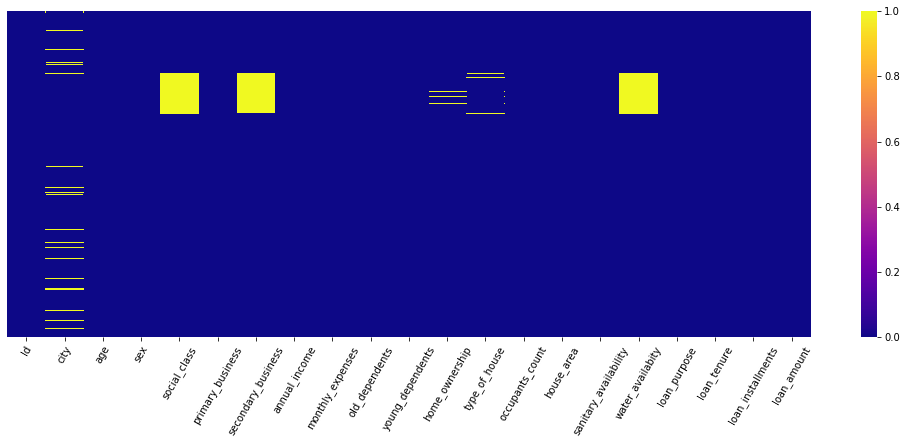

In [34]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),yticklabels=False, xticklabels=df.columns, cmap='plasma') 
plt.xticks(rotation=60)

In [35]:
df.isnull().sum()

Id                          0
city                     1798
age                         0
sex                         0
social_class             5047
primary_business           26
secondary_business       5034
annual_income               0
monthly_expenses           14
old_dependents              0
young_dependents            0
home_ownership            231
type_of_house             539
occupants_count             0
house_area                  0
sanitary_availability       0
water_availabity         5045
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [36]:
## Check the percentage of null values

In [37]:
col_null=[]
percentage=[]
counts=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        null=df[col].isnull().sum()
        percent=round((df[col].isnull().sum()/df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [38]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
1,social_class,5047,12.68
7,water_availabity,5045,12.68
3,secondary_business,5034,12.65
0,city,1798,4.52
6,type_of_house,539,1.35
5,home_ownership,231,0.58
2,primary_business,26,0.07
8,loan_purpose,26,0.07
4,monthly_expenses,14,0.04


In [39]:
## From the above table we can see that the highest percentage of missing values columns are social_class, 
## water_availability, secondary_class and it not too much so that we can impute

In [40]:
#imputing missing values for continuous variables
for num in df.select_dtypes(('float64', 'int64')):
    if df[num].isnull().sum()!=0:
        df[num]=df[num].fillna(df[num].mean())

In [41]:
#imputing the missing value of a categorical variables with most common entry
for col in df.select_dtypes('object'):
    #print(df[col].value_counts().index[0])
    df[col]=df[col].fillna(df[col].value_counts().index[0])

In [42]:
df.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [43]:
## Let us find the outliers through the interquartile range 
## which fall outside of q1-1.5*iqr and q3+1.5*iqr

In [44]:
cont_var = df.select_dtypes(exclude=object).columns.to_list()

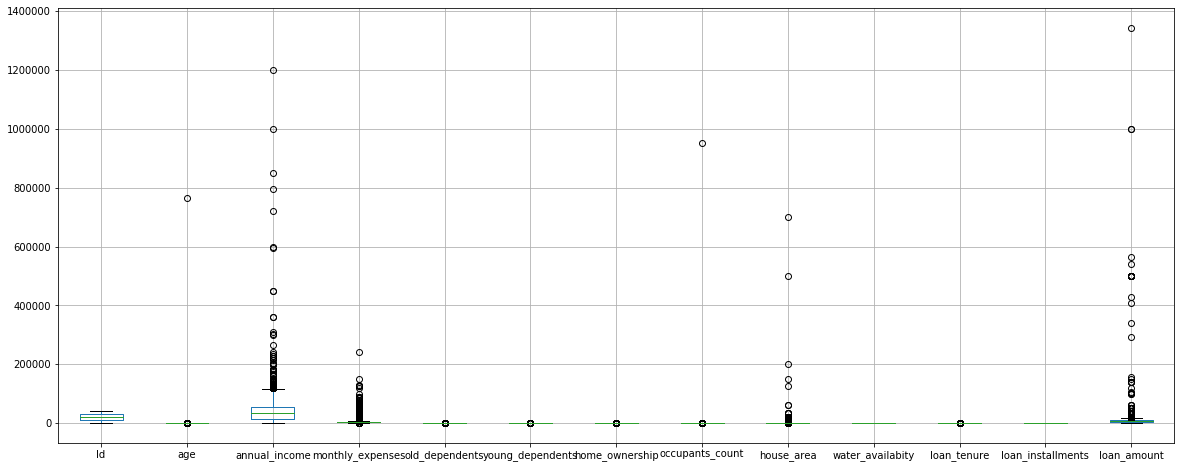

In [45]:
df[cont_var].boxplot(return_type='axes',figsize=(20,8))

In [46]:
dict_outliers = dict()
for column in df[cont_var].select_dtypes(('int64', 'float64')):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print('column:', column)
    print('Q1 and Q3',q1,q3)
    iqr_r = 3.0*iqr
    lower_limit = q1 - iqr_r
    upper_limit = q3 + iqr_r
    dict_outliers[column] = len(df[(df[column]<lower_limit) | (df[column]>upper_limit)][column])

column: Id
Q1 and Q3 10129.5 30052.5
column: age
Q1 and Q3 29.0 42.0
column: annual_income
Q1 and Q3 15000.0 56000.0
column: monthly_expenses
Q1 and Q3 2500.0 4000.0
column: old_dependents
Q1 and Q3 0.0 0.0
column: young_dependents
Q1 and Q3 0.0 2.0
column: home_ownership
Q1 and Q3 1.0 1.0
column: occupants_count
Q1 and Q3 2.0 4.0
column: house_area
Q1 and Q3 200.0 600.0
column: water_availabity
Q1 and Q3 0.5 1.0
column: loan_tenure
Q1 and Q3 12.0 12.0
column: loan_installments
Q1 and Q3 12.0 50.0
column: loan_amount
Q1 and Q3 5000.0 10000.0


In [47]:
dict_outliers

{'Id': 0,
 'age': 5,
 'annual_income': 33,
 'monthly_expenses': 570,
 'old_dependents': 1669,
 'young_dependents': 0,
 'home_ownership': 1318,
 'occupants_count': 19,
 'house_area': 724,
 'water_availabity': 0,
 'loan_tenure': 706,
 'loan_installments': 0,
 'loan_amount': 78}

In [48]:
for column in df.select_dtypes(('int64', 'float64')):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    #print('column:', column)
    #print('Q1 and Q3',q1,q3)
    iqr_r = 3.0*iqr
    lower_limit = q1 - iqr_r
    upper_limit = q3 + iqr_r
    #f_new = df[((df < (lower_limit)) |(df > (upper_limit))).any(axis=1)]
    inames = df[(df[column] < lower_limit) | (df[column] > upper_limit)].index
    df.drop(inames, inplace = True) 

In [49]:
df.shape

(35217, 21)

In [50]:
df.old_dependents.value_counts()

0    35217
Name: old_dependents, dtype: int64

In [51]:
df = df[(df['old_dependents'] == 0.0) | (df['sanitary_availability'] == 1.0)]

In [52]:
df['old_dependents'] = df['old_dependents'].astype('category')

In [53]:
df.young_dependents.value_counts()

0    12272
2    10374
1     8929
3     2978
4      563
5       80
6       18
7        3
Name: young_dependents, dtype: int64

In [54]:
df = df[(df['young_dependents'] == 0) | (df['young_dependents'] == 1) | (df['young_dependents'] == 2) | (df['young_dependents'] == 3) | (df['young_dependents'] == 4)]

In [55]:
df.shape

(35116, 21)

In [56]:
df['young_dependents'] = df['young_dependents'].astype('category')

In [57]:
df['young_dependents'].value_counts()

0    12272
2    10374
1     8929
3     2978
4      563
Name: young_dependents, dtype: int64

In [58]:
df['occupants_count'].value_counts()

4     9031
2     8680
3     7675
0     4442
5     2413
1     2215
6      504
7       94
8       30
10      22
9       10
Name: occupants_count, dtype: int64

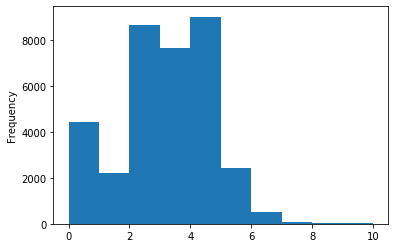

In [59]:
df['occupants_count'].plot(kind='hist')

In [60]:
df = df[(df['occupants_count'] == 0) | (df['occupants_count'] == 1) | (df['occupants_count'] == 2) | (df['occupants_count'] == 3) | (df['occupants_count'] == 4) | (df['occupants_count'] == 5) | (df['occupants_count'] == 6) | (df['occupants_count'] == 7) | (df['occupants_count'] == 8) | (df['occupants_count'] == 9) | (df['occupants_count'] == 10)]

In [61]:
df['occupants_count'] = df['occupants_count'].astype('category')

In [62]:
df.shape

(35116, 21)

In [63]:
df['water_availabity'].value_counts()

1.000000    15920
0.500000    14609
0.753267     4430
0.000000      157
Name: water_availabity, dtype: int64

In [64]:
df['loan_installments'].value_counts()

12    25555
50     9391
51       61
2        43
53       28
55       17
4        12
74        5
52        3
6         1
Name: loan_installments, dtype: int64

In [65]:
df = df[(df['loan_installments'] == 12) | (df['loan_installments'] == 50) | (df['loan_installments'] ==24) | (df['loan_installments'] == 6) | (df['loan_installments'] == 51)]

In [66]:
df.shape

(35008, 21)

In [67]:
df['loan_installments'] = df['loan_installments'].astype('category')

In [68]:
df.describe()

,Id,age,annual_income,monthly_expenses,home_ownership,house_area,water_availabity,loan_tenure,loan_amount
count,35008.000000,35008.000000,35008.000000,35008.000000,35008.0,35008.000000,35008.000000,35008.0,35008.000000
mean,19900.289248,35.712437,36861.288763,3432.963787,1.0,457.563386,0.756113,12.0,8125.522738
std,11353.956514,8.615704,25396.689961,1173.289296,0.0,380.265296,0.238569,0.0,3007.731847
min,1.000000,2.000000,0.000000,2.000000,1.0,0.000000,0.000000,12.0,500.000000
25%,10001.750000,29.000000,14400.000000,2700.000000,1.0,200.000000,0.500000,12.0,5000.000000
50%,20038.500000,35.000000,36000.000000,3500.000000,1.0,400.000000,0.753267,12.0,8000.000000
75%,29588.250000,42.000000,54000.000000,4000.000000,1.0,600.000000,1.000000,12.0,10000.000000
max,40000.000000,74.000000,168000.000000,8500.000000,1.0,1800.000000,1.000000,12.0,20000.000000


In [69]:
df.describe(include='category')

,old_dependents,young_dependents,occupants_count,sanitary_availability,loan_installments
count,35008,35008,35008,35008.0,35008
unique,1,5,11,2.0,4
top,0,0,4,1.0,12
freq,35008,12201,9027,24184.0,25555


In [70]:
df.shape

(35008, 21)

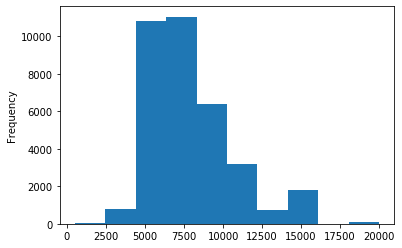

In [71]:
df.loan_amount.plot(kind='hist')

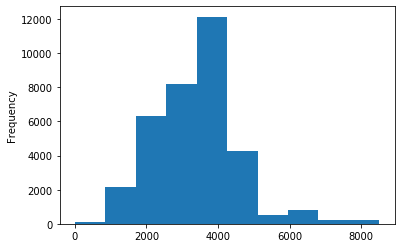

In [72]:
df.monthly_expenses.plot(kind='hist')

In [73]:
dfnew = df

D:\softwares\AnacondaFiles\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\softwares\AnacondaFiles\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


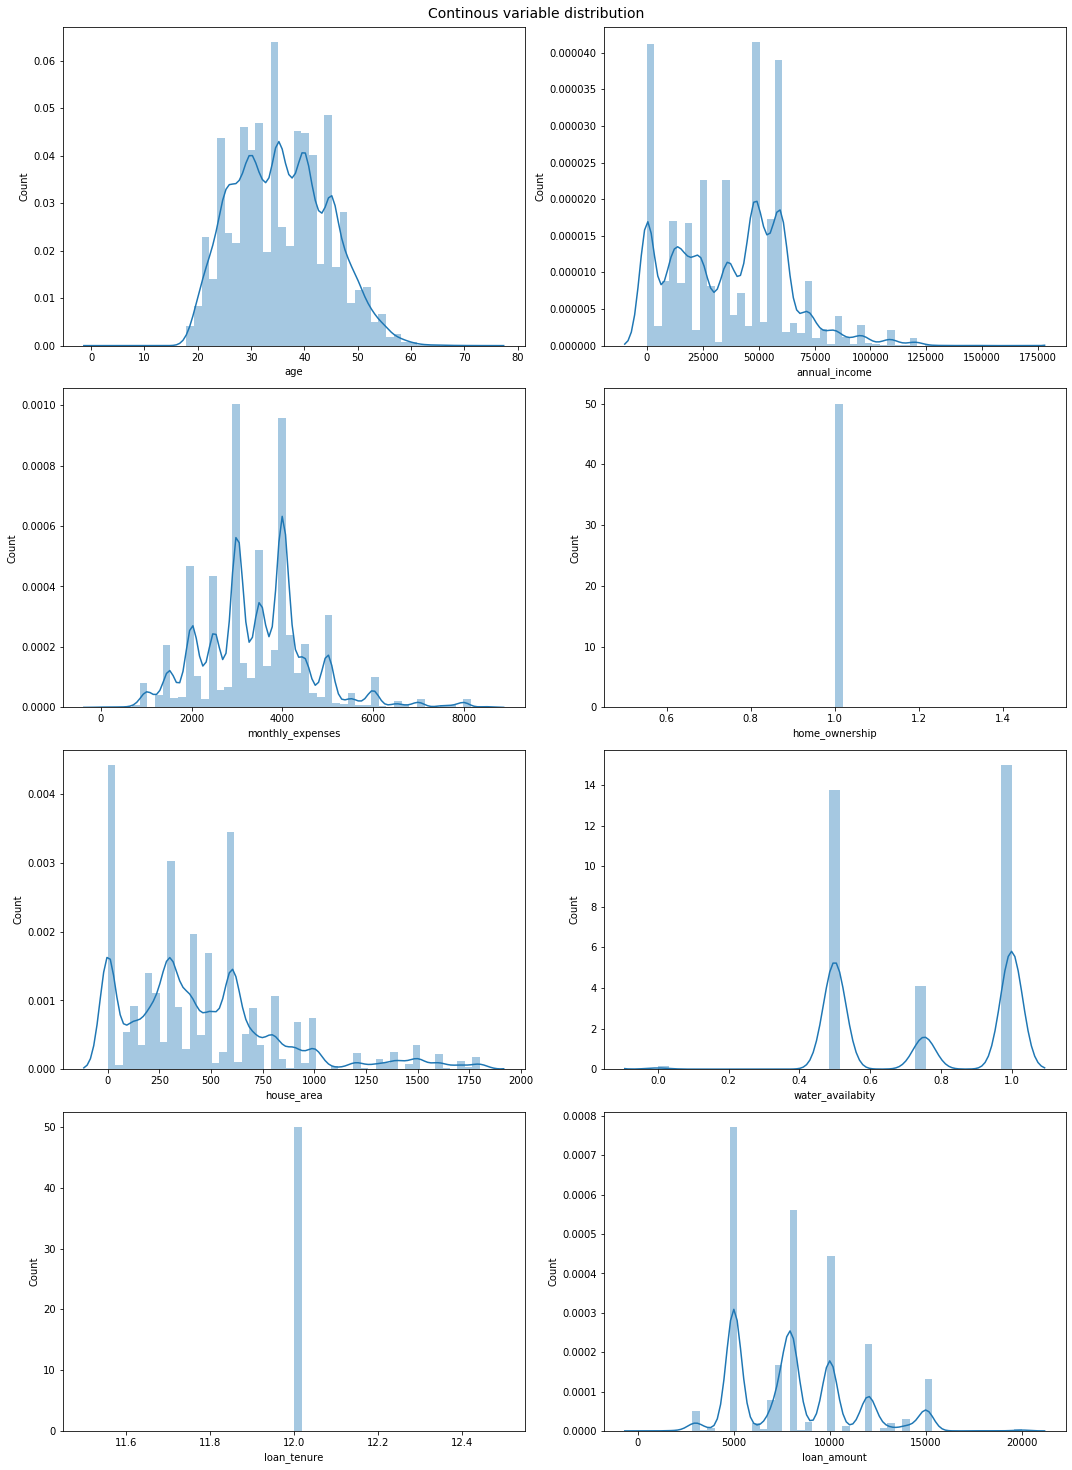

In [74]:
plt.figure(figsize=(15,60))
n=1
columns = dfnew.select_dtypes(('float64', 'int64')).drop(['Id'],axis=1)
for col in columns:
    if col!='price':
        plt.subplot(12,2,n)
        sns.distplot(df[col])
        plt.ylabel('Count')
        plt.tight_layout()
        n=n+1

plt.suptitle('Continous variable distribution',fontsize=14,y=1.002)
plt.show()

In [75]:
## From the above plots we can see most of the distribtions are pretty normal
## and the features like old_dependents, home_ownership,loan_tenure has only
## one category so it doesnt add any value and we can drop them

In [76]:
dfnew = dfnew.drop(columns=['old_dependents','home_ownership','loan_tenure'],axis=1)

In [77]:
dfnew.shape

(35008, 18)

In [78]:
dfnew.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'young_dependents', 'type_of_house', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_installments', 'loan_amount'],
      dtype='object')

In [79]:
(dfnew.social_class.value_counts() >20).sum()

66

In [80]:
dfnew.social_class.value_counts().head(20)

OBC               13560
SC                 2839
ST                 2364
General            2131
Muslim             1629
S.C                 916
Minority            869
GC                  779
Sechudle Caste      740
G.C                 718
Hindu               630
S.C.                517
GEN                 385
MUSLIM              369
NT                  358
Sc                  348
Obc                 317
General Caste       278
Gen                 252
S.c                 239
Name: social_class, dtype: int64

In [81]:
dfnew['social_class'] = np.where((dfnew.social_class == 'Hindu'),'General/Hindu',dfnew.social_class)

dfnew['social_class'] = dfnew['social_class'].replace(['NT','VJNT','Mahar','Ezhava','Lingahitha','Christian','Maratha','okkaliga','Kuruba','Bauddha','BC','MBC','Genarel','O B C','Minority Comunity'],'Others')

dfnew['social_class'] = dfnew['social_class'].replace(['SC','S.C','S.T','s.c','st','S.T.','ST','SC/ST','S.c.','scst','Schudle Cast','Sechudle Caste','sc','Sc','S.C.','S.c'],'SC/ST')

dfnew['social_class'] = dfnew['social_class'].replace(['General','Gen','OPEN','Hindu','GENERAL','Open','General Caste','GEN','GC','G.C'],'General/Hindu')

dfnew['social_class'] = dfnew['social_class'].replace(['Muslim','Minority','MINORITY','MUSLIM','Musilim'],'Muslims')

dfnew['social_class'] = dfnew['social_class'].replace(['OBC','O.B.C.','obc','Obc','O.B.C'],'OBC')


#dfnew['social_class'] = dfnew['social_class'].replace([''],'Others')

In [82]:
def class_social(x):
    if (x == 'OBC'):
        return 'OBC'
    elif (x == 'Muslims'):
        return 'Muslims'
    elif (x == 'General/Hindu'):
        return 'General/Hindu'
    elif (x == 'SC/ST'):
        return 'SC/ST'
    else:
        return 'Others'
dfnew['social_class'] = dfnew.social_class.apply(lambda x: class_social(x))

In [83]:
dfnew.loan_purpose.value_counts().head(37)

Apparels                           6012
Agro Based Businesses              4199
Animal husbandry                   4044
Meat Businesses                    3985
Handicrafts                        3726
Farming/ Agriculture               2682
Retail Store                       1718
Education Loan                     1676
Eateries                           1624
Tobacco Related Activities          787
Business Services - II              780
Construction Related Activities     568
Retail Sale                         548
Artifical Jewellry Selling          501
Carpentery work                     262
Food Items                          258
Business Services - I               248
Flower Business                     229
Transportation Services             208
Repair Services                     169
Beauty Salon                        165
Laundry Services                    149
Utensil Selling                     101
Agarbatti Business                   97
Sanitation                           84


In [84]:
def loan_pur(x):
    if (x == 'Apparels') or (x == 'Agro Based Businesses'):
        return 'Agro_Textiles'
    elif (x == 'Farming/ Agriculture'):
        return 'Farming/ Agriculture'
    elif (x == 'Animal husbandry') or (x =='Meat Businesses'):
        return 'Animal_rel_business'
    elif (x == 'Eateries') or (x == 'Food Items'):
        return 'Food_related'
    elif (x == 'Handicrafts') or (x == 'Carpentery work'):
        return 'Handicrafts'
    elif (x == 'Retail Store') or (x == 'Retail Sale'):
        return 'Retail_business'
    elif (x == 'Education Loan'):
        return 'Education_loan'
    else:
        return 'Other_servies'
    
dfnew['loan_purpose'] = dfnew.loan_purpose.apply(lambda x: loan_pur(x))

In [85]:
dfnew[['social_class']] = dfnew[['social_class']].astype('category')
dfnew[['loan_purpose']] = dfnew[['loan_purpose']].astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35008 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     35008 non-null  int64   
 1   city                   35008 non-null  object  
 2   age                    35008 non-null  int64   
 3   sex                    35008 non-null  object  
 4   social_class           35008 non-null  object  
 5   primary_business       35008 non-null  object  
 6   secondary_business     35008 non-null  object  
 7   annual_income          35008 non-null  float64 
 8   monthly_expenses       35008 non-null  float64 
 9   old_dependents         35008 non-null  category
 10  young_dependents       35008 non-null  category
 11  home_ownership         35008 non-null  float64 
 12  type_of_house          35008 non-null  object  
 13  occupants_count        35008 non-null  category
 14  house_area             35008 non-null 

In [87]:
dfbirvar = ['age', 'sex',
       'annual_income', 'monthly_expenses','secondary_business',
       'young_dependents', 'type_of_house', 'occupants_count', 'house_area','social_class',
       'sanitary_availability', 'water_availabity','loan_purpose',
       'loan_installments']

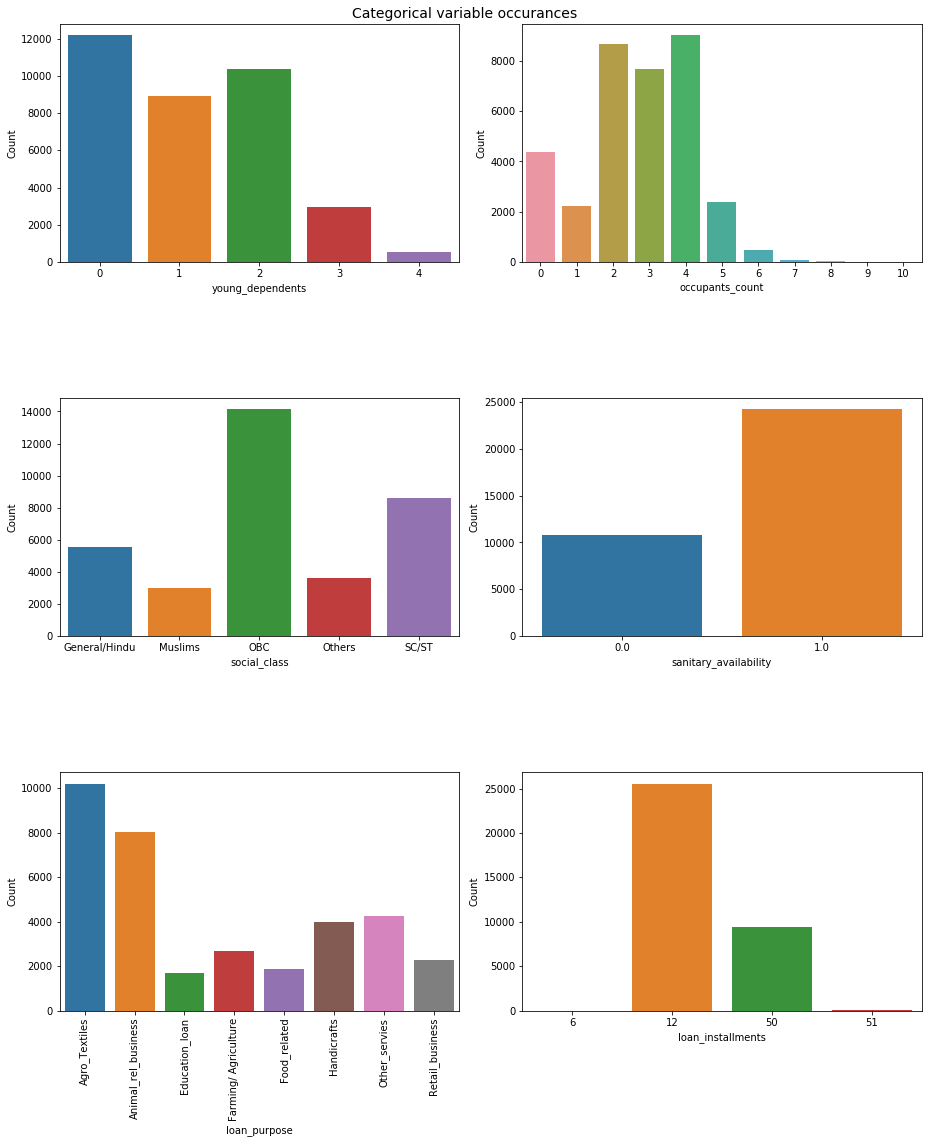

In [88]:
plt.figure(figsize=(13,40))
n=1
for col in dfnew[dfbirvar].select_dtypes('category'):
    plt.subplot(8,2,n)
    sns.countplot(x=col, data=dfnew)
    plt.ylabel('Count')
    plt.tight_layout()
    n=n+1
    if (col=='secondary_business'):                 
         plt.xticks(rotation=90)
    elif (col=='loan_purpose'): 
        plt.xticks(rotation=90)

plt.suptitle('Categorical variable occurances',fontsize=14,y=1.002)
plt.show()

In [89]:
dfnew.sex.value_counts()

F     33176
M      1827
TG        5
Name: sex, dtype: int64

In [90]:
dfnew.drop(dfnew[dfnew['sex'] == 'TG'].index, inplace = True) 

In [91]:
dfnew.shape

(35003, 18)

In [92]:
### From the above plots we can understand that 98% of the people were females who have taken the loan & repaid it
## Most of the people who took loan belong to OBC and SC/ST category as we know they are the most backward category
## people so they were in need of money and have paid it back
## When it comes to people whose house is of type T1 and T2 were recepients of loans
## Highest loans were taken on purpose of Agro based, animal based, handicrafts and farming related businesses

In [93]:
df_co = dfnew.drop(['Id'],axis=1)

In [94]:
dfnew.shape,df_co.shape

((35003, 18), (35003, 17))

In [95]:
dfnew.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,young_dependents,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_installments,loan_amount
0,1,Dhanbad,22,F,Others,Tailoring,Others,36000.0,5000.0,2,R,4,70.0,1.0,0.5,Agro_Textiles,12,5000.0
2,3,Dhanbad,24,M,Others,Beauty salon,Others,48000.0,4000.0,2,T1,4,50.0,1.0,0.5,Other_servies,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,2,T1,5,50.0,1.0,0.5,Agro_Textiles,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,T1,1,112.0,1.0,0.5,Retail_business,12,5000.0
5,6,Nuapada,23,F,OBC,General store,none,36000.0,3500.0,0,T1,1,112.0,1.0,0.5,Retail_business,12,5000.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35008 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     35008 non-null  int64   
 1   city                   35008 non-null  object  
 2   age                    35008 non-null  int64   
 3   sex                    35008 non-null  object  
 4   social_class           35008 non-null  object  
 5   primary_business       35008 non-null  object  
 6   secondary_business     35008 non-null  object  
 7   annual_income          35008 non-null  float64 
 8   monthly_expenses       35008 non-null  float64 
 9   old_dependents         35008 non-null  category
 10  young_dependents       35008 non-null  category
 11  home_ownership         35008 non-null  float64 
 12  type_of_house          35008 non-null  object  
 13  occupants_count        35008 non-null  category
 14  house_area             35008 non-null 

### Bivariate analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

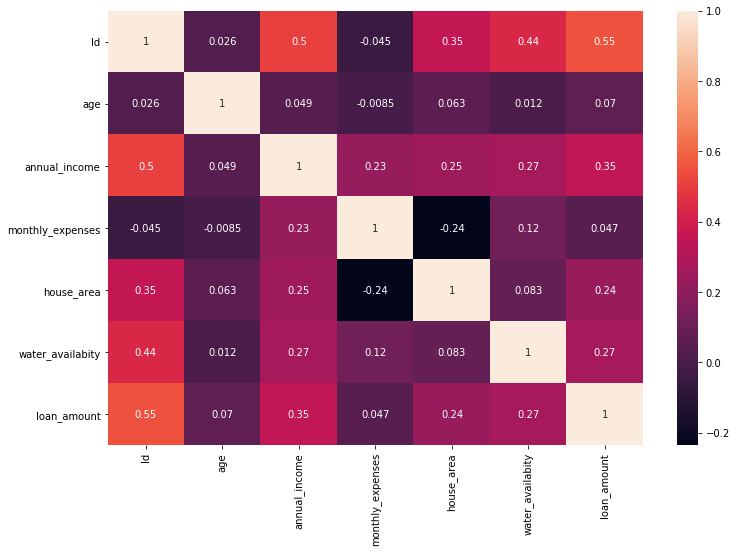

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(dfnew.corr(),xticklabels=dfnew.corr().columns.values,yticklabels=dfnew.corr().columns.values,annot=True);
plt.xticks(rotation=90)

In [98]:
### From the above heatmap we can get to know that the target 'loam_amount' is correlated to annual_income but not much
## occupants count, young dependants, house area are decently correlated with each other

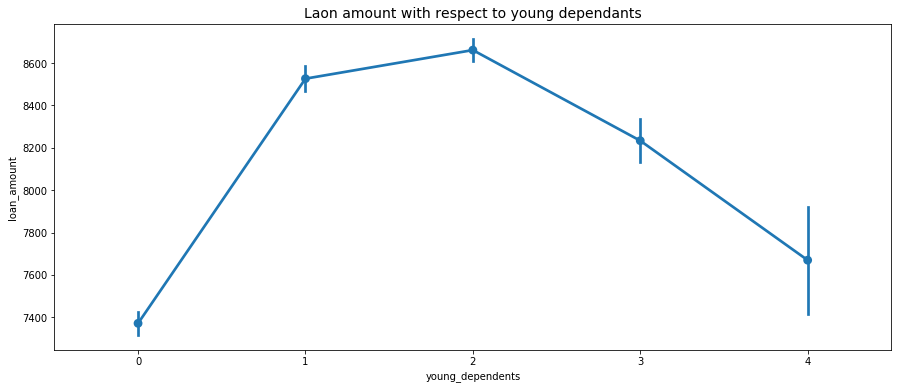

In [99]:
plt.figure(figsize=(15,6))
sns.pointplot(x='young_dependents', y='loan_amount', data=dfnew)
plt.title('Laon amount with respect to young dependants',fontsize=14)
plt.show()

In [100]:
#### The loan amount given got decreased if young dependents are more than 3 that may be 
## because they are dependant on others and very young so they may not be having a reliable source of income

In [101]:
dfnew.young_dependents.value_counts()

0    12201
2    10361
1     8915
3     2967
4      559
Name: young_dependents, dtype: int64

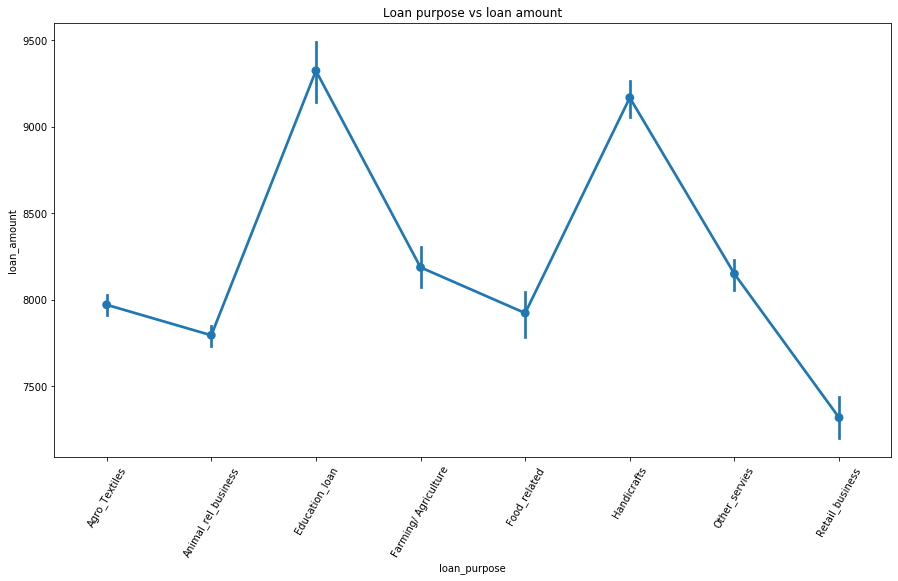

In [102]:
plt.figure(figsize=(15,8))
plt.title('Loan purpose vs loan amount')
chart=sns.pointplot(x='loan_purpose', y='loan_amount', data=dfnew)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

In [103]:
### It is clear that highest loan amount is given for handicrafts and education loan followed by food and animal based business

### EDA and Feature Engineering

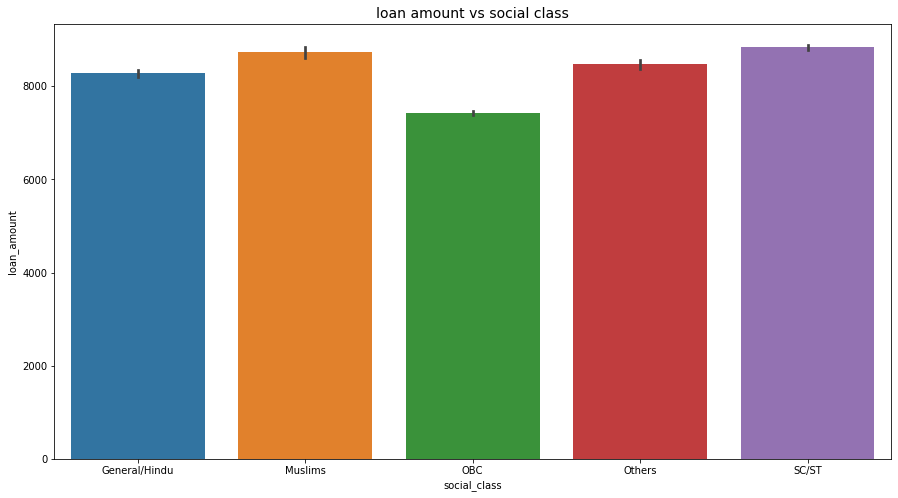

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x='social_class', y='loan_amount', data=dfnew)
plt.title('loan amount vs social class',fontsize=14)
plt.show()

In [105]:
### The loan amount given was almost the same for all the classes in society

In [106]:
dfnew.primary_business.value_counts().head(20)

Tailoring                 3581
Goat rearing              2086
Cow Rearing               1941
Handloom Work             1924
Vegetable cultivation     1571
Grocery store             1237
Milk business             1175
School                    1089
Vegetable vendor           989
Saree business             882
Embroidery work            854
Weaver                     790
Fish rearing               708
Poultry farm               687
Rice business              624
General store              615
Paddy cultivation          532
Cloth business             522
Buffalo rearing            469
Beedi rolling business     451
Name: primary_business, dtype: int64

In [107]:
dfnew.annual_income.value_counts().head(20)

0.0        4757
48000.0    4394
60000.0    4152
36000.0    2541
24000.0    2435
12000.0    1763
54000.0    1585
18000.0    1528
72000.0    1009
30000.0     876
42000.0     789
14400.0     735
9600.0      526
84000.0     446
50000.0     405
40000.0     366
96000.0     320
66000.0     241
8400.0      215
78000.0     188
Name: annual_income, dtype: int64

In [108]:
def income(x):
    if x == 0:
        return 'zero'
    elif (x>0) and (x<=20000):
        return 'Under_20k'
    elif (x>20000) and (x<=40000):
        return 'Under_40k'
    elif (x>40000):
        return 'Morethan_40k'

In [109]:
dfnew['income_class'] = dfnew.annual_income.apply(lambda x : income(x))

In [110]:
dfnew.income_class.value_counts()

Morethan_40k    16748
Under_40k        7083
Under_20k        6415
zero             4757
Name: income_class, dtype: int64

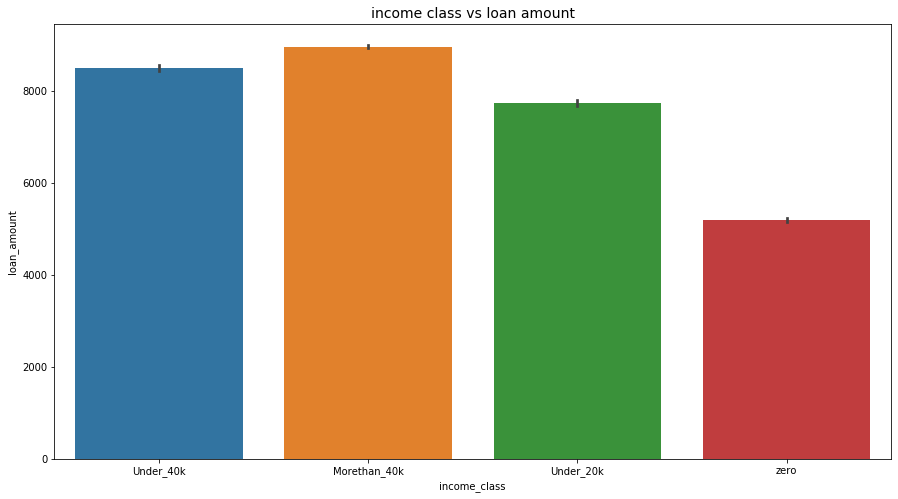

In [111]:
plt.figure(figsize=(15,8))
sns.barplot(x='income_class', y='loan_amount', data=dfnew)
plt.title('income class vs loan amount',fontsize=14)
plt.show()

In [112]:
### If there is high income high loan amount was given which is obvious but for people with zero income also
### was granted loan amount around 5000 on average, may be for educatin loan by guess but lets check it out

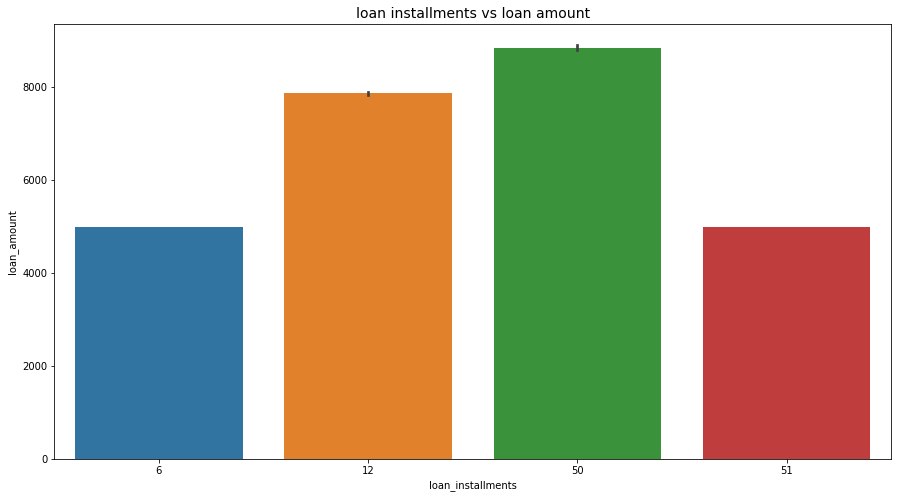

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(x='loan_installments', y='loan_amount', data=dfnew)
plt.title('loan installments vs loan amount',fontsize=14)
plt.show()

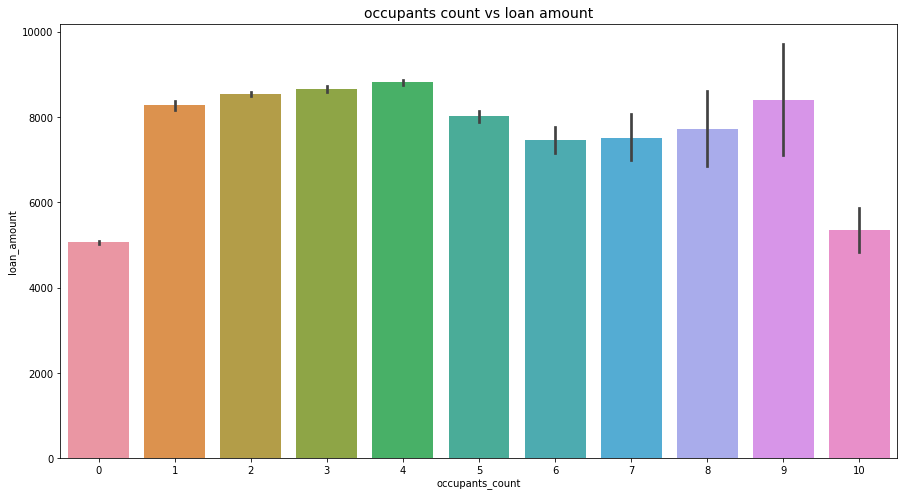

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(x='occupants_count', y='loan_amount', data=dfnew)
plt.title('occupants count vs loan amount',fontsize=14)
plt.show()

In [115]:
#### Loan amount is not much dependent on occupants count, its almost the same

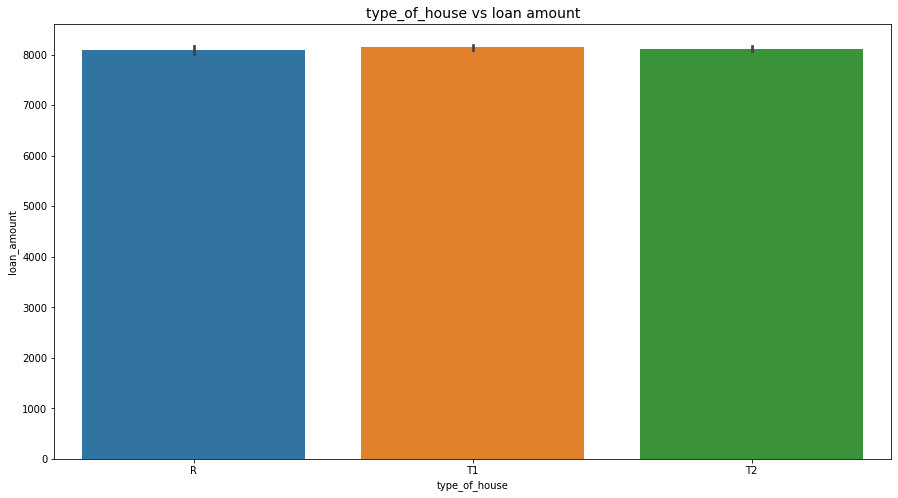

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(x='type_of_house', y='loan_amount', data=dfnew)
plt.title('type_of_house vs loan amount',fontsize=14)
plt.show()

In [117]:
dfnew.primary_business.value_counts().head(50)

Tailoring                         3581
Goat rearing                      2086
Cow Rearing                       1941
Handloom Work                     1924
Vegetable cultivation             1571
Grocery store                     1237
Milk business                     1175
School                            1089
Vegetable vendor                   989
Saree business                     882
Embroidery work                    854
Weaver                             790
Fish rearing                       708
Poultry farm                       687
Rice business                      624
General store                      615
Paddy cultivation                  532
Cloth business                     522
Buffalo rearing                    469
Beedi rolling business             451
Education Loan                     402
Paddy processing                   374
Thread making                      321
Cattle rearing                     295
Betel shop                         293
Petty shop               

In [118]:
dfnew.annual_income.value_counts().head(10)

0.0        4757
48000.0    4394
60000.0    4152
36000.0    2541
24000.0    2435
12000.0    1763
54000.0    1585
18000.0    1528
72000.0    1009
30000.0     876
Name: annual_income, dtype: int64

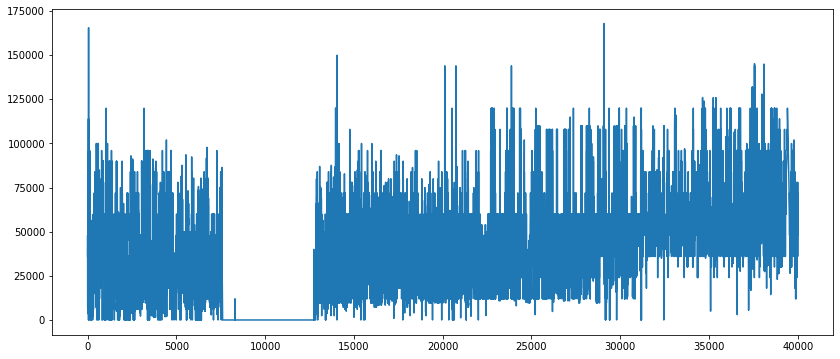

In [119]:
import matplotlib.pyplot as plt
dfnew.annual_income.plot(kind='line',figsize=(14,6))

In [120]:
def income(x):
    if (x>0) and (x<=7500):
        return 'Under_7.5k'
    elif (x>7500) and (x<=1300):
        return 'Under_13k'
    elif (x>13000) and (x<=20000):
        return 'Under_20k'
    elif (x>20000) and (x<=30000):
        return 'Under_30k'
    elif (x>30000) and (x<=40000):
        return 'Under_40k'
    elif (x>40000) and (x<=50000):
        return 'Under_50k'
    elif (x>50000):
        return 'Morethan_50k'

In [121]:
dfnew['income_class'] = dfnew.annual_income.apply(lambda x : income(x))

In [122]:
dfnew.income_class.value_counts()

Morethan_50k    10704
Under_50k        6044
Under_30k        3872
Under_40k        3211
Under_20k        3055
Under_7.5k        607
Name: income_class, dtype: int64

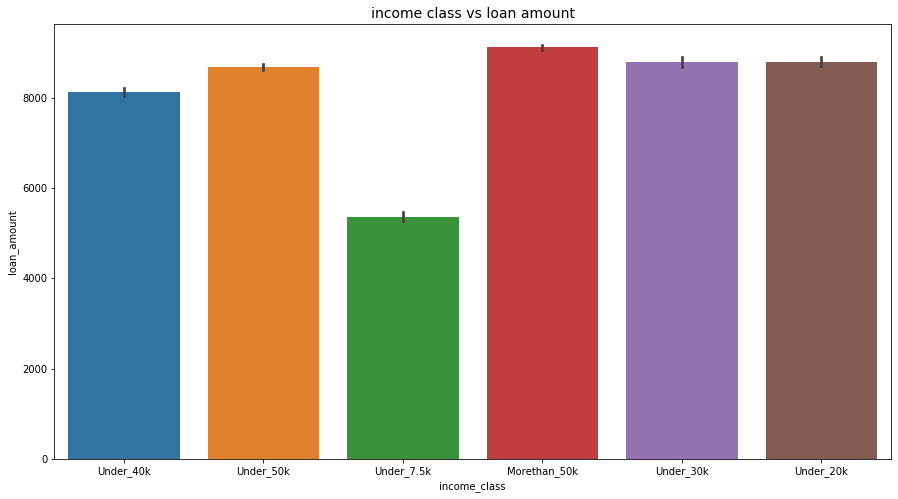

In [123]:
plt.figure(figsize=(15,8))
sns.barplot(x='income_class', y='loan_amount', data=dfnew)
plt.title('income class vs loan amount',fontsize=14)
plt.show()

In [124]:
### If there is high income high loan amount was given which is obvious but for people with zero income also
### was granted loan amount around 5000 on average, may be for educatin loan by guess but lets check it out

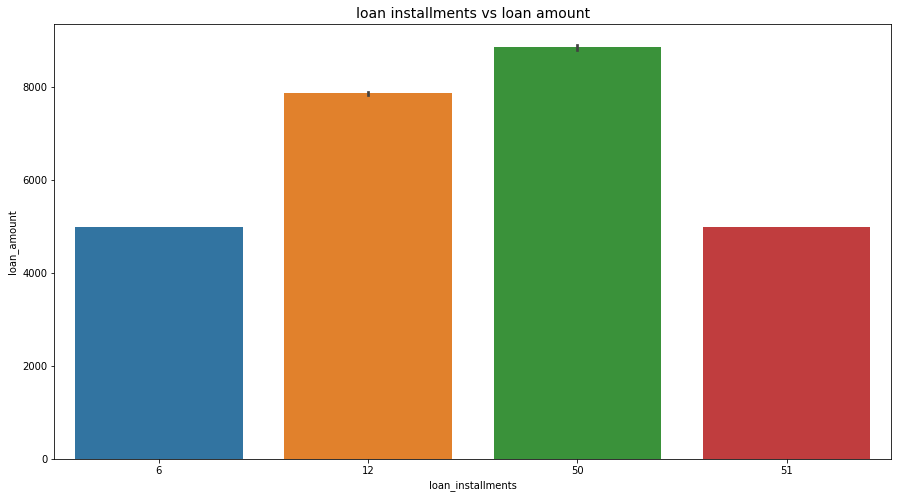

In [125]:
plt.figure(figsize=(15,8))
sns.barplot(x='loan_installments', y='loan_amount', data=dfnew)
plt.title('loan installments vs loan amount',fontsize=14)
plt.show()

In [126]:
### If the loan installments are below 50 that means within 4 years they are going to pay the highest loan
### amount was given compared to more than 50 loan installments

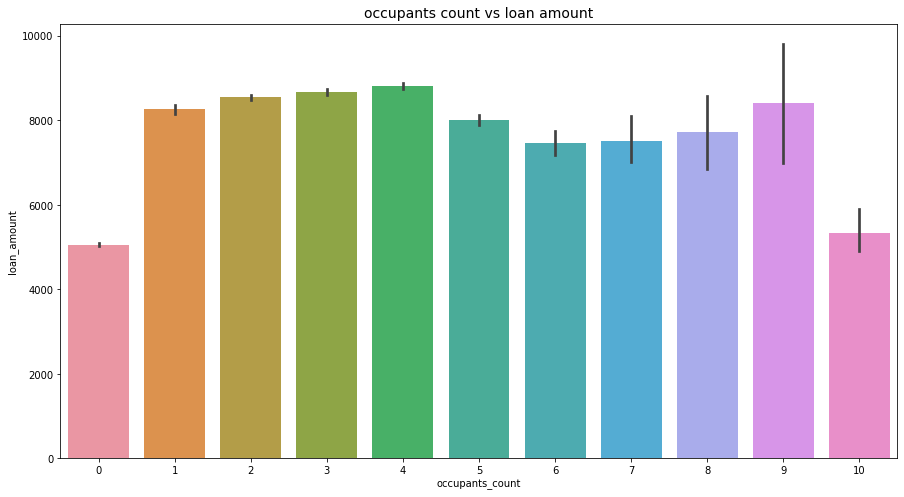

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(x='occupants_count', y='loan_amount', data=dfnew)
plt.title('occupants count vs loan amount',fontsize=14)
plt.show()

In [128]:
#### Loan amount is not much dependent on occupants count, its almost the same

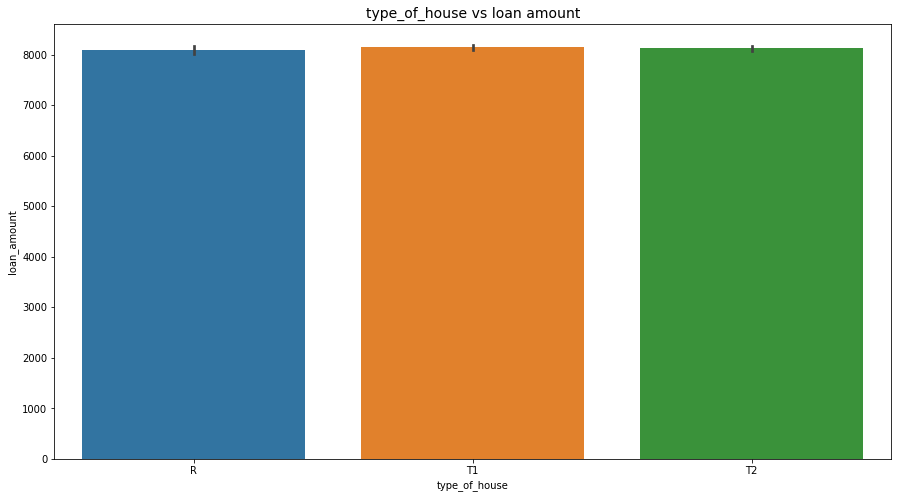

In [129]:
plt.figure(figsize=(15,8))
sns.barplot(x='type_of_house', y='loan_amount', data=dfnew)
plt.title('type_of_house vs loan amount',fontsize=14)
plt.show()

In [130]:
### Type of house seems no differentiator so we can drop the column and also sex column

In [131]:
dfnew.columns,dfnew.shape

(Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
        'secondary_business', 'annual_income', 'monthly_expenses',
        'young_dependents', 'type_of_house', 'occupants_count', 'house_area',
        'sanitary_availability', 'water_availabity', 'loan_purpose',
        'loan_installments', 'loan_amount', 'income_class'],
       dtype='object'),
 (35003, 19))

In [132]:
dfnew = dfnew.drop(['type_of_house'],axis=1)

In [133]:
dfnew = dfnew.drop(['sex'],axis=1)

In [134]:
def p_business(x):
    if (x == 'Tailoring'):
        return 'Tailoring'
    elif (x== 'Goat rearing') or (x == 'Cow Rearing') or (x=='Buffalo rearing') or (x =='Cattle rearing') or (x=='Fish rearing') or (x=='Sheep rearing') or (x=='Pig rearing'):
        return 'Animal_rearing'
    elif (x == 'Handloom Work') or ( x == 'Cloth business') or (x == 'Embroidery work') or ( x=='Saree business') or (x=='Readymade Garments'):
        return 'Cloth business'
    elif (x == 'Vegetable cultivation') or (x=='Paddy cultivation') or (x=='Gram cultivation') or (x=='Banana Cultivation'):
        return 'Crop Cultivation'
    elif (x == 'Grocery store') or (x == 'General store') or (x=='Rice business'):
        return 'Grocery store'
    elif (x == 'Milk business') or (x=='Milk products') or (x=='Tea stall') or (x=='Snacks business'):
        return 'Milk business'
    elif ( x =='School') or (x=='Education Loan') or (x=='College'):
        return 'Education'
    else:
        return 'Other_business'

In [135]:
dfnew['p_business'] = dfnew.primary_business.apply(lambda x : p_business(x))

In [136]:
dfnew[['p_business']] = dfnew[['p_business']].astype('category')

In [137]:
dfnew.p_business.value_counts()

Other_business      13417
Animal_rearing       5566
Cloth business       4365
Tailoring            3581
Grocery store        2476
Crop Cultivation     2324
Milk business        1750
Education            1524
Name: p_business, dtype: int64

In [138]:
dfnew.columns

Index(['Id', 'city', 'age', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'young_dependents', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_installments', 'loan_amount', 'income_class', 'p_business'],
      dtype='object')

In [139]:
dfnew.head()

,Id,city,age,social_class,primary_business,secondary_business,annual_income,monthly_expenses,young_dependents,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_installments,loan_amount,income_class,p_business
0,1,Dhanbad,22,Others,Tailoring,Others,36000.0,5000.0,2,4,70.0,1.0,0.5,Agro_Textiles,12,5000.0,Under_40k,Tailoring
2,3,Dhanbad,24,Others,Beauty salon,Others,48000.0,4000.0,2,4,50.0,1.0,0.5,Other_servies,12,5000.0,Under_50k,Other_business
3,4,Pusad,26,OBC,Tailoring,none,7000.0,5000.0,2,5,50.0,1.0,0.5,Agro_Textiles,50,7500.0,Under_7.5k,Tailoring
4,5,Nuapada,23,OBC,General store,Agriculture,36000.0,3500.0,0,1,112.0,1.0,0.5,Retail_business,12,5000.0,Under_40k,Grocery store
5,6,Nuapada,23,OBC,General store,none,36000.0,3500.0,0,1,112.0,1.0,0.5,Retail_business,12,5000.0,Under_40k,Grocery store


In [140]:
dfnew.income_class.nunique()

6

In [141]:
dfnew['income_class'] = dfnew.income_class.astype('category')

In [142]:
dfnew.select_dtypes(include='category').head()

,social_class,young_dependents,occupants_count,sanitary_availability,loan_purpose,loan_installments,income_class,p_business
0,Others,2,4,1.0,Agro_Textiles,12,Under_40k,Tailoring
2,Others,2,4,1.0,Other_servies,12,Under_50k,Other_business
3,OBC,2,5,1.0,Agro_Textiles,50,Under_7.5k,Tailoring
4,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store
5,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store


In [143]:
dfnew.city.value_counts().head(50)

Pusad             4584
Bahoriband        1953
PUSAD             1739
Shantipur         1668
Mathurapur        1292
Imphal            1220
SANDESHKHALI      1017
Joynagar           947
Kozhinjampara      837
Gwalior            756
Nuapada            754
Baruipur           710
Muzaffarpur        678
GWALIOR            596
Pune               565
Balasore           537
Parola             522
Puri               489
Jhabua             475
Sambalpur          443
Santipur           442
Digras             383
Palakkad           317
Kumardhubi         302
pune               301
Daspalla           285
Chirkunda          281
Mysore             249
Niligiri           214
Bhubaneswar        209
Gocharan           205
D.Barasat          201
SAMBALPUR          192
Bishnupur          185
Chandanpur         176
Kakching           144
Nanjnagud          133
NUAPADA            133
Periyapatna        132
Bahragoda          123
Nanjangud          117
Vadakkencherry     117
Policeline         115
Nabadwip   

In [144]:
def city(a):
    if (a == 'Pusad') or (a == 'PUSAD'):
        return 'Pusad'
    elif (a == 'Bahoriband'):
        return 'Bahoriband'
    elif (a == 'Shantipur'):
        return 'Shantipur'
    elif (a == 'Mathurapur'):
        return 'Mathurapur'
    elif (a == 'SANDESHKHALI'):
        return 'SANDESHKHALI'
    elif (a == 'Joynagar'):
        return 'Joynagar'
    elif (a == 'Kozhinjampara'):
        return 'Kozhinjampara'
    elif (a == 'pune') or (a=='Pune'):
        return 'Pune'
    else:
        return 'Other'

In [145]:
dfnew['cityname'] = dfnew.city.apply(lambda x : city(x))

In [146]:
dfnew = dfnew.drop(['city'],axis=1)

In [147]:
dfnew.primary_business.nunique()

403

In [148]:
#dfnew = dfnew.drop('city',axis=1)
dfnew = dfnew.drop('primary_business',axis=1)

In [149]:
dfnew.water_availabity.value_counts()

1.000000    15875
0.500000    14606
0.753267     4365
0.000000      157
Name: water_availabity, dtype: int64

In [150]:
dfnew['cityname'] = dfnew['cityname'].astype('category')

In [151]:
dfnew.p_business.value_counts(), dfnew.secondary_business.value_counts()

(Other_business      13417
 Animal_rearing       5566
 Cloth business       4365
 Tailoring            3581
 Grocery store        2476
 Crop Cultivation     2324
 Milk business        1750
 Education            1524
 Name: p_business, dtype: int64,
 none                   28442
 Others                  2406
 Daily wage labourer     2250
 Agriculture             1755
 Livestock rearing        150
 Name: secondary_business, dtype: int64)

In [152]:
dfnew['income_class']=dfnew['income_class'].fillna(dfnew['income_class'].value_counts().index[0])

In [153]:
dfnew.p_business.isnull().sum()

0

In [154]:
dfnew.select_dtypes(include='category').head()

,social_class,young_dependents,occupants_count,sanitary_availability,loan_purpose,loan_installments,income_class,p_business,cityname
0,Others,2,4,1.0,Agro_Textiles,12,Under_40k,Tailoring,Other
2,Others,2,4,1.0,Other_servies,12,Under_50k,Other_business,Other
3,OBC,2,5,1.0,Agro_Textiles,50,Under_7.5k,Tailoring,Pusad
4,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store,Other
5,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store,Other


In [155]:
dfnew.secondary_business.value_counts()

none                   28442
Others                  2406
Daily wage labourer     2250
Agriculture             1755
Livestock rearing        150
Name: secondary_business, dtype: int64

In [156]:
cat_colnames = dfnew.select_dtypes(include='category').columns.to_list()

In [157]:
cat_colnames

['social_class',
 'young_dependents',
 'occupants_count',
 'sanitary_availability',
 'loan_purpose',
 'loan_installments',
 'income_class',
 'p_business',
 'cityname']

In [158]:
nominal_cols = ['social_class','secondary_business','loan_purpose','p_business','cityname']

### Statistical analysis

In [159]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2

In [160]:
def chisquare(table):
    #df_chi = pd.read_csv('chi-test.csv')
    contingency_table = table
    #print('contingency_table :-\n',contingency_table)
    #Observed Values
    Observed_Values = contingency_table.values 
    #print("Observed Values :-\n",Observed_Values)
    b=stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    #print("Expected Values :-\n",Expected_Values)
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom:-",ddof)
    alpha = 0.001
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    print('critical_value:',critical_value)
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',ddof)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
#     if chi_square_statistic>=critical_value:
#         print("Reject H0, There is a relationship between 2 categorical variables")
#     else:
#         print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between " + i[0] + " and " + i[1])
    else:
        print("Reject H0,There is no relationship between " + i[0] + " and " + i[1])

In [161]:
pair = [(i,j) for i in nominal_cols for j in nominal_cols]

In [162]:
for i in pair:
    if i[0] != i[1]:
        social_crosstab = pd.crosstab(dfnew[i[0]], dfnew[i[1]], 
                                       margins=True)
        chisquare(social_crosstab)
        

Degree of Freedom:- 1
chi-square statistic:- 803.2043173524918
critical_value: 10.827566170662733
p-value: 0.0
Significance level:  0.001
Degree of Freedom:  1
chi-square statistic: 803.2043173524918
critical_value: 10.827566170662733
p-value: 0.0
Reject H0,There is a relationship between social_class and secondary_business
Degree of Freedom:- 1
chi-square statistic:- 562.4419768033931
critical_value: 10.827566170662733
p-value: 0.0
Significance level:  0.001
Degree of Freedom:  1
chi-square statistic: 562.4419768033931
critical_value: 10.827566170662733
p-value: 0.0
Reject H0,There is a relationship between social_class and loan_purpose
Degree of Freedom:- 1
chi-square statistic:- 2334.375555448692
critical_value: 10.827566170662733
p-value: 0.0
Significance level:  0.001
Degree of Freedom:  1
chi-square statistic: 2334.375555448692
critical_value: 10.827566170662733
p-value: 0.0
Reject H0,There is a relationship between social_class and p_business
Degree of Freedom:- 1
chi-square sta

In [163]:
dfnew.columns

Index(['Id', 'age', 'social_class', 'secondary_business', 'annual_income',
       'monthly_expenses', 'young_dependents', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_installments', 'loan_amount', 'income_class', 'p_business',
       'cityname'],
      dtype='object')

In [164]:
#dfnew = dfnew.drop(['loan_purpose'],axis=1)

In [165]:
dfnew.shape

(35003, 17)

In [166]:
df_num = dfnew.select_dtypes(include=['int64','float64'])

In [167]:
df_num.shape

(35003, 7)

In [168]:
df_num.head()

,Id,age,annual_income,monthly_expenses,house_area,water_availabity,loan_amount
0,1,22,36000.0,5000.0,70.0,0.5,5000.0
2,3,24,48000.0,4000.0,50.0,0.5,5000.0
3,4,26,7000.0,5000.0,50.0,0.5,7500.0
4,5,23,36000.0,3500.0,112.0,0.5,5000.0
5,6,23,36000.0,3500.0,112.0,0.5,5000.0


In [169]:
df_cat = dfnew.select_dtypes('category')

In [170]:
df_cat.head()

,social_class,young_dependents,occupants_count,sanitary_availability,loan_purpose,loan_installments,income_class,p_business,cityname
0,Others,2,4,1.0,Agro_Textiles,12,Under_40k,Tailoring,Other
2,Others,2,4,1.0,Other_servies,12,Under_50k,Other_business,Other
3,OBC,2,5,1.0,Agro_Textiles,50,Under_7.5k,Tailoring,Pusad
4,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store,Other
5,OBC,0,1,1.0,Retail_business,12,Under_40k,Grocery store,Other


In [171]:
df_cat.cityname.value_counts()

Other            20100
Pusad             6323
Bahoriband        1953
Shantipur         1668
Mathurapur        1292
SANDESHKHALI      1017
Joynagar           947
Pune               866
Kozhinjampara      837
Name: cityname, dtype: int64

In [172]:
# dummies - social_class, secondary_busines, sanitary_availability,loan_purpose, income_class,p_business
# labelencode - young_dependants,occupants_count, loan_installments, city_name

In [173]:
dum_cols = ['social_class', 'sanitary_availability','loan_purpose', 'income_class','p_business']
label_cols = ['young_dependants', 'loan_installments']

In [174]:
dfnew.columns

Index(['Id', 'age', 'social_class', 'secondary_business', 'annual_income',
       'monthly_expenses', 'young_dependents', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_installments', 'loan_amount', 'income_class', 'p_business',
       'cityname'],
      dtype='object')

In [175]:
df_dum = dfnew[['social_class','sanitary_availability','income_class','p_business']]

In [176]:
df_labelcols = dfnew[['young_dependents','loan_installments','cityname']]

In [177]:
df_dum_enc = pd.get_dummies(df_dum, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [178]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 

df_labelcols['young_dependents'] = label_encoder.fit_transform(df_labelcols['young_dependents'])
df_labelcols['loan_installments'] = label_encoder.fit_transform(df_labelcols['loan_installments'])
df_labelcols['cityname'] = label_encoder.fit_transform(df_labelcols['cityname'])

D:\softwares\AnacondaFiles\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\softwares\AnacondaFiles\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\softwares\AnacondaFiles\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [179]:
df_num.shape

(35003, 7)

In [180]:
final_df = pd.concat([df_num,df_dum_enc,df_labelcols],axis=1)

In [181]:
final_df.shape

(35003, 31)

In [182]:
final_df.columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'house_area',
       'water_availabity', 'loan_amount', 'social_class_General/Hindu',
       'social_class_Muslims', 'social_class_OBC', 'social_class_Others',
       'social_class_SC/ST', 'sanitary_availability_0.0',
       'sanitary_availability_1.0', 'income_class_Morethan_50k',
       'income_class_Under_20k', 'income_class_Under_30k',
       'income_class_Under_40k', 'income_class_Under_50k',
       'income_class_Under_7.5k', 'p_business_Animal_rearing',
       'p_business_Cloth business', 'p_business_Crop Cultivation',
       'p_business_Education', 'p_business_Grocery store',
       'p_business_Milk business', 'p_business_Other_business',
       'p_business_Tailoring', 'young_dependents', 'loan_installments',
       'cityname'],
      dtype='object')

In [183]:
final_df.head()

,Id,age,annual_income,monthly_expenses,house_area,water_availabity,loan_amount,social_class_General/Hindu,social_class_Muslims,social_class_OBC,...,p_business_Cloth business,p_business_Crop Cultivation,p_business_Education,p_business_Grocery store,p_business_Milk business,p_business_Other_business,p_business_Tailoring,young_dependents,loan_installments,cityname
0,1,22,36000.0,5000.0,70.0,0.5,5000.0,0,0,0,...,0,0,0,0,0,0,1,2,1,4
2,3,24,48000.0,4000.0,50.0,0.5,5000.0,0,0,0,...,0,0,0,0,0,1,0,2,1,4
3,4,26,7000.0,5000.0,50.0,0.5,7500.0,0,0,1,...,0,0,0,0,0,0,1,2,2,6
4,5,23,36000.0,3500.0,112.0,0.5,5000.0,0,0,1,...,0,0,0,1,0,0,0,0,1,4
5,6,23,36000.0,3500.0,112.0,0.5,5000.0,0,0,1,...,0,0,0,1,0,0,0,0,1,4


In [184]:
x=final_df.drop(['Id','loan_amount'],axis=1)
y=final_df['loan_amount']                        

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [185]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24502, 29)
(10501, 29)
(24502,)
(10501,)


In [186]:
rmse_linear_regression = LinearRegression()
rmse_linear_regression.fit(x_train,y_train)
pred = rmse_linear_regression.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('Linear Regression RMSE: ',math.sqrt(rmse))

Linear Regression RMSE:  2513.8788618408093


In [187]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.30741905533528846


In [188]:
metrics.adjusted_rand_score(y_test,pred)

4.457054371322176e-05

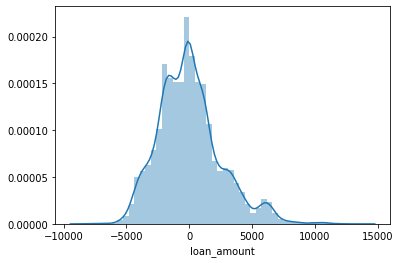

In [189]:
sns.distplot(y_test-pred)

In [190]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=3)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('Decision Tree RMSE: ',math.sqrt(rmse))

Decision Tree RMSE:  2137.278892179381


In [191]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.4993845606983214


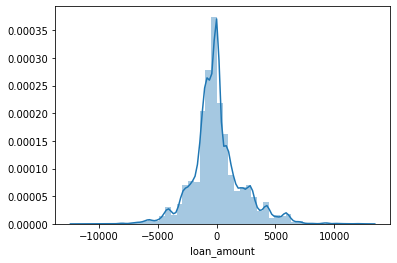

In [192]:
sns.distplot(y_test-pred)

In [193]:
rand = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4598, verbose=0, warm_start=False)
rand.fit(x_train,y_train)
pred=rand.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('RandomForest RMSE: ',math.sqrt(rmse))

RandomForest RMSE:  1923.6840091819658


In [194]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.5944454148745117


In [195]:
importance=rand.feature_importances_

In [196]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
1,annual_income,0.27
3,house_area,0.13
0,age,0.10
2,monthly_expenses,0.10
28,cityname,0.09
4,water_availabity,0.06
26,young_dependents,0.04
27,loan_installments,0.03
21,p_business_Education,0.02
10,sanitary_availability_0.0,0.02


In [450]:
newdf = final_df.drop(['Id'],axis=1)

In [451]:
newdf.head()

,Id,age,annual_income,monthly_expenses,house_area,water_availabity,loan_amount,social_class_General/Hindu,social_class_Muslims,social_class_OBC,...,p_business_Cloth business,p_business_Crop Cultivation,p_business_Education,p_business_Grocery store,p_business_Milk business,p_business_Other_business,p_business_Tailoring,young_dependents,loan_installments,cityname
0,1,22,36000.0,5000.0,70.0,0.5,5000.0,0,0,0,...,0,0,0,0,0,0,1,2,1,4
2,3,24,48000.0,4000.0,50.0,0.5,5000.0,0,0,0,...,0,0,0,0,0,1,0,2,1,4
3,4,26,7000.0,5000.0,50.0,0.5,7500.0,0,0,1,...,0,0,0,0,0,0,1,2,2,6
4,5,23,36000.0,3500.0,112.0,0.5,5000.0,0,0,1,...,0,0,0,1,0,0,0,0,1,4
5,6,23,36000.0,3500.0,112.0,0.5,5000.0,0,0,1,...,0,0,0,1,0,0,0,0,1,4


### Experimenting with pycaret library

In [455]:
from pycaret import regression

In [456]:
regression_setup = regression.setup(data= newdf, target='loan_amount')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4598
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(35003, 31)"
4,Missing Values,False
5,Numeric Features,28
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [462]:
regression_lr = regression.create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1830.5676,5531641.9945,2351.9443,0.4236,0.2901,0.2481
1,1746.6369,5199141.8388,2280.1627,0.4397,0.2730,0.2239
2,1760.5574,5364483.0126,2316.1354,0.4428,0.2690,0.2251
3,1719.9581,5159888.9283,2271.5389,0.4699,0.2700,0.2275
4,1720.2858,4943727.5564,2223.4495,0.4480,0.2641,0.2232
5,1683.6718,4634222.7723,2152.7245,0.4585,0.2632,0.2251
6,1733.8256,5144275.1550,2268.0995,0.4519,0.2694,0.2276
7,1693.8175,4905462.9558,2214.8280,0.4484,0.2627,0.2231
8,1739.3748,5109291.2639,2260.3741,0.4237,0.2705,0.2312
9,1737.8417,5211739.8501,2282.9235,0.4266,0.2706,0.2273


In [463]:
regression_dt = regression.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1377.1429,6402965.9864,2530.4083,0.3329,0.2803,0.1652
1,1278.2313,5911877.5510,2431.4353,0.3628,0.2689,0.1522
2,1275.7823,5752829.9320,2398.5058,0.4024,0.2605,0.1478
3,1200.1361,5654190.4762,2377.8542,0.4191,0.2545,0.1422
4,1265.3061,5644653.0612,2375.8479,0.3697,0.2689,0.1413
5,1247.4830,5311197.2789,2304.6035,0.3794,0.2616,0.1499
6,1165.3061,4995088.4354,2234.9694,0.4678,0.2481,0.1372
7,1327.3469,5965197.2789,2442.3753,0.3292,0.2777,0.1627
8,1193.1973,5300163.2653,2302.2083,0.4021,0.2605,0.1465
9,1211.5804,5387098.0926,2321.0123,0.4073,0.2533,0.1436


In [464]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,1103.4515,2907644.3976,1704.2737,0.6838,0.1929,0.1357,0.4978
1,Extreme Gradient Boosting,1157.6367,2967884.9501,1721.1626,0.6778,0.1973,0.1445,0.4377
2,CatBoost Regressor,1226.4084,3079649.2767,1753.9186,0.6654,0.2033,0.1553,2.9081
3,Extra Trees Regressor,1123.2773,3099089.9530,1759.3167,0.6632,0.2005,0.1389,0.4912
4,Light Gradient Boosting Machine,1226.6540,3121646.2069,1765.7963,0.6608,0.2040,0.1543,0.1806
5,Gradient Boosting Regressor,1410.2879,3796420.8642,1947.6328,0.5874,0.2277,0.1809,0.8490
6,K Neighbors Regressor,1455.8547,4609677.1214,2145.9891,0.4988,0.2493,0.1844,0.0623
7,Lasso Regression,1735.6880,5119653.1374,2262.0585,0.4434,0.2702,0.2280,0.1732
8,Linear Regression,1736.6537,5120387.5328,2262.2180,0.4433,0.2703,0.2282,0.0111
9,Ridge Regression,1736.6044,5120310.1799,2262.2015,0.4433,0.2702,0.2282,0.0059


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4598, verbose=0, warm_start=False)

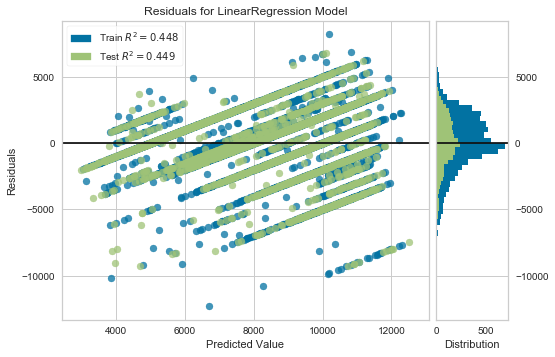

In [465]:
regression.plot_model(regression_lr, plot ='residuals')

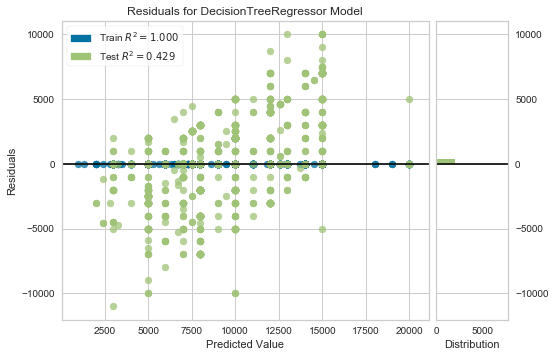

In [466]:
regression.plot_model(regression_dt, plot = 'residuals')